In [ ]:
# %%capture
# !pip install -U pandasql
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import altair as alt
# from pandasql import sqldf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
table = pd.read_csv('/content/drive/MyDrive/Thesis/csvs/Full2018-2020.csv')
table.head()

Date  IDStation  ...  PM25  Sulfur_dioxide
0  2018-01-01T00:00:00Z        677  ...  45.0        1.829167
1  2018-01-01T00:00:00Z        705  ...  33.0        1.487500
2  2018-01-01T00:00:00Z        681  ...   4.0             NaN
3  2018-01-01T00:00:00Z        642  ...  46.0        5.941667
4  2018-01-01T00:00:00Z        693  ...  43.0        4.487500

[5 rows x 19 columns]

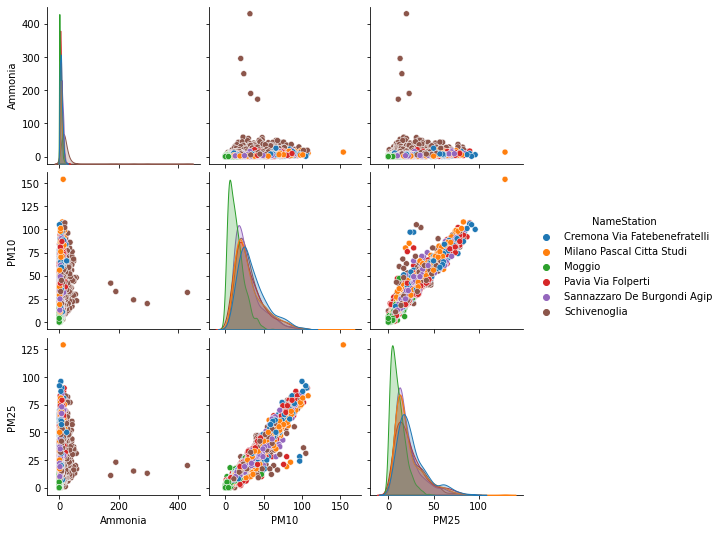

In [ ]:
sns.pairplot(table.iloc[:,[2,3,16,17]],hue="NameStation")

In [ ]:
table1 = pd.read_csv('/content/drive/MyDrive/Thesis/csvs/NNdata.csv')
table1.head()

Date  IDStation  ... Wind_direction_max  Rainfall
0  2018-01-01T00:00:00Z        677  ...                NaN       7.2
1  2018-01-01T00:00:00Z        705  ...              163.0      10.6
2  2018-01-01T00:00:00Z        681  ...              144.0       2.4
3  2018-01-01T00:00:00Z        642  ...                NaN       7.4
4  2018-01-01T00:00:00Z        693  ...                NaN       NaN

[5 rows x 33 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


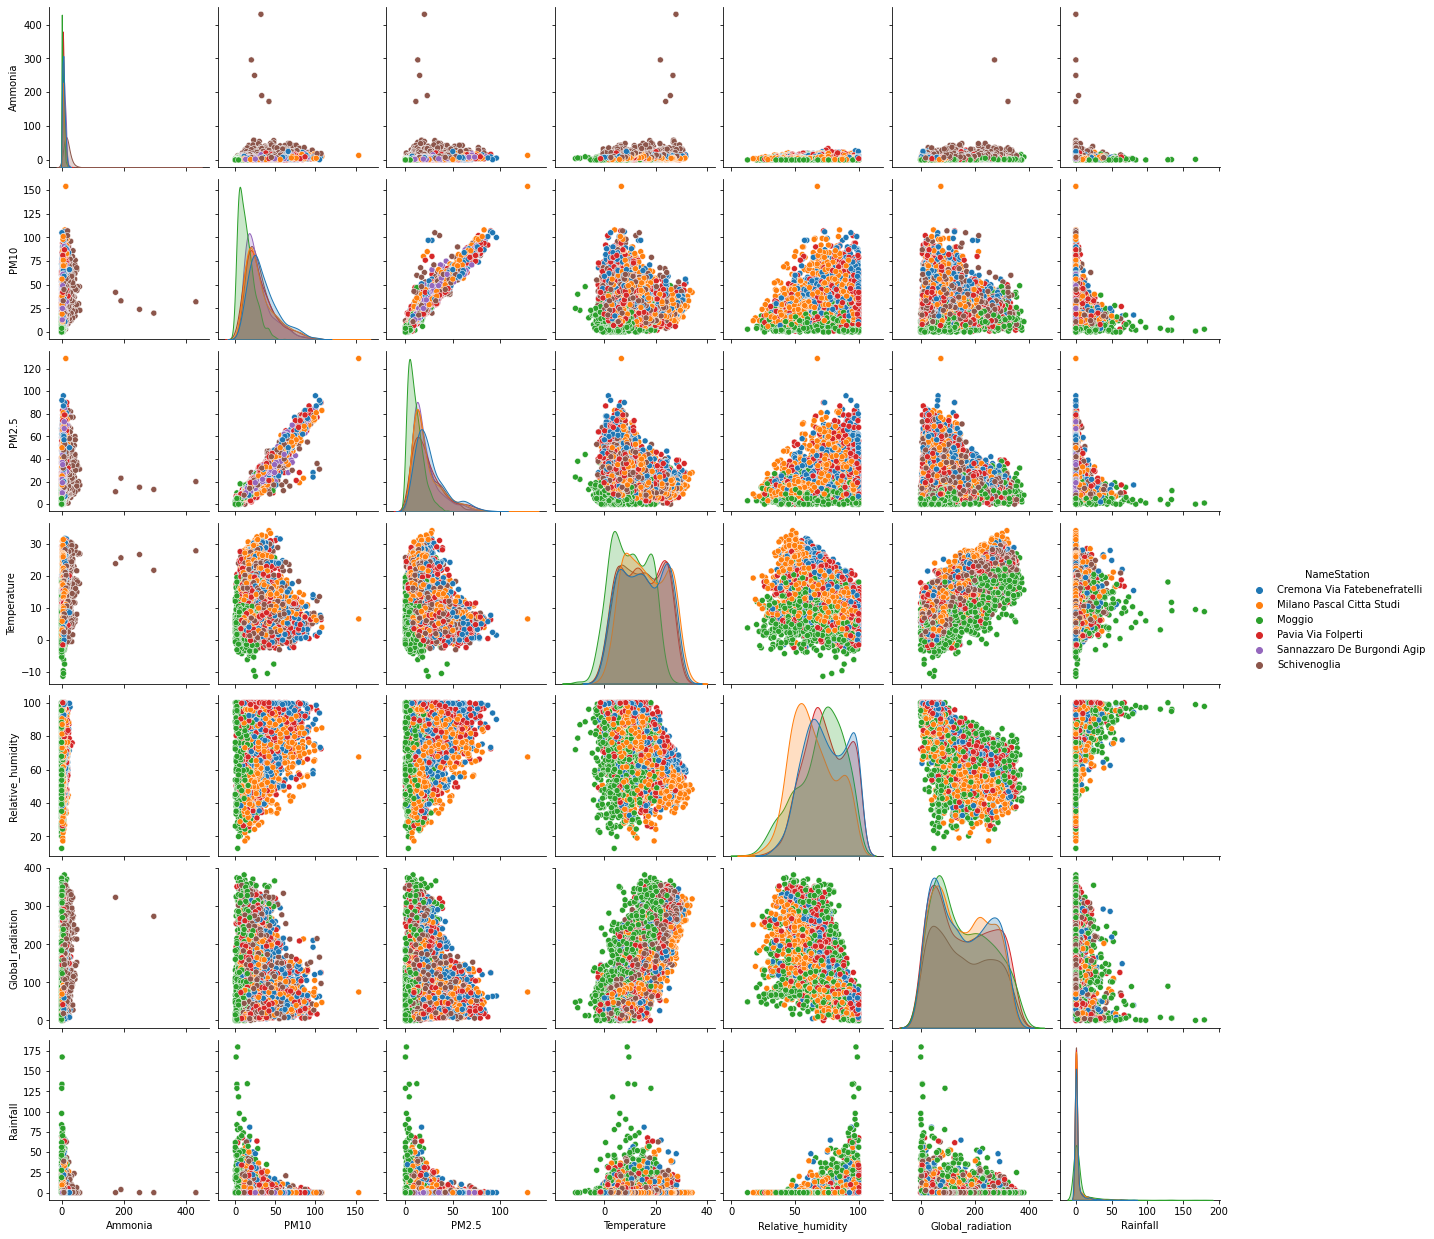

In [ ]:
sns.pairplot(table1.loc[:,['NameStation','Ammonia','PM10','PM2.5','Temperature','Relative_humidity','Global_radiation','Rainfall']],hue="NameStation")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


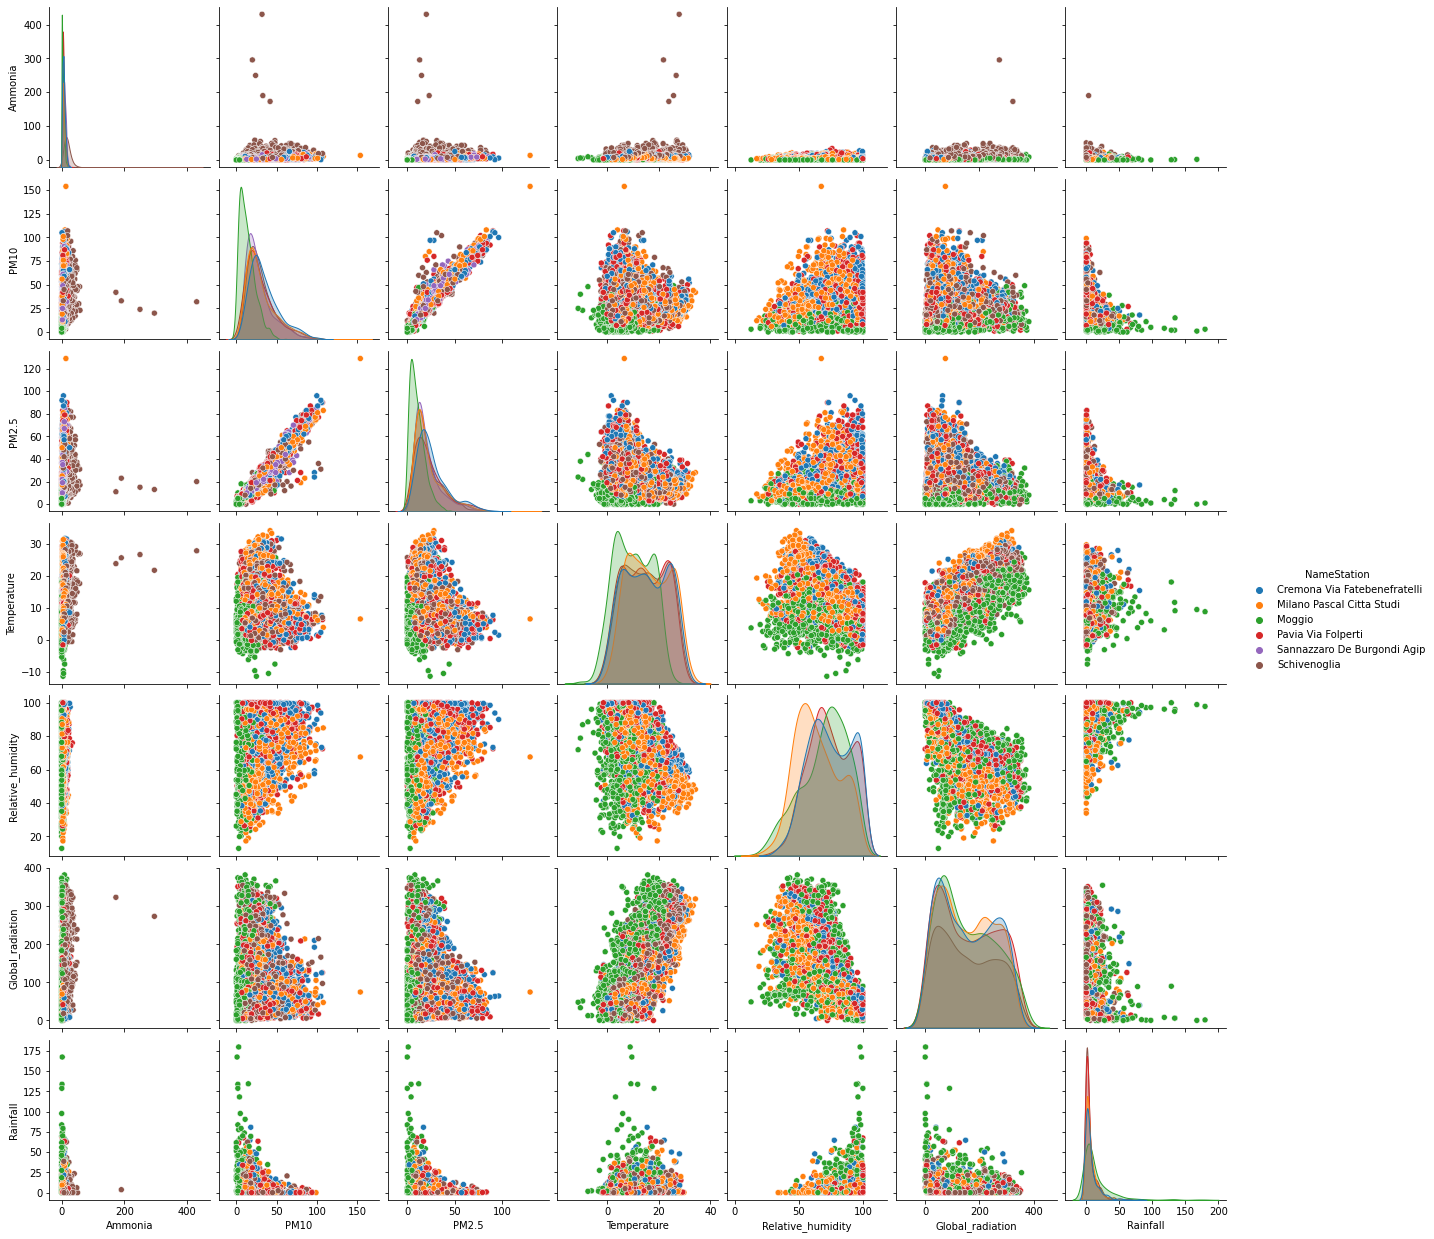

In [ ]:
# now with rainfall zero values set to NaN
table1r = table1.copy()
table1r.loc[table1.loc[:,'Rainfall']==0,'Rainfall'] = np.nan
sns.pairplot(table1r.loc[:,['NameStation','Ammonia','PM10','PM2.5','Temperature','Relative_humidity','Global_radiation','Rainfall']],hue="NameStation")

In [ ]:

table2 = table.iloc[2000:np.shape(table)[0],:] #altair can only use up to 5000 rows

interval = alt.selection_interval()

points = alt.Chart(table2).mark_point().encode(
  x='PM10',
  y='Ammonia',
  color=alt.condition(interval, 'NameStation', alt.value('lightgray'))
).properties(
  selection=interval
)

histogram = alt.Chart(table2).mark_bar().encode(
  x='count()',
  y='NameStation',
  color='NameStation'
).transform_filter(interval)

points & histogram

alt.VConcatChart(...)

In [ ]:
table2 = table.iloc[2000:np.shape(table)[0],:] #altair can only use up to 5000 rows
table3 = table2.copy()
# remove outliers
table3.loc[table2.loc[:,'Ammonia']>150,'Ammonia'] = np.nan
table3.loc[table2.loc[:,'PM10']>140,'PM10'] = np.nan

In [ ]:

# create plot again
interval = alt.selection_interval()

points = alt.Chart(table3).mark_point().encode(
  x='PM10',
  y='Ammonia',
  color=alt.condition(interval, 'NameStation', alt.value('lightgray'))
).properties(
  selection=interval
)

histogram = alt.Chart(table3).mark_bar().encode(
  x='count()',
  y='NameStation',
  color='NameStation'
).transform_filter(interval)

points & histogram

alt.VConcatChart(...)

In [ ]:
# bubble chart scatterplot